In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## 1. Convert Image to another color space

- Gray Scale Image :
- YCrCb Color Space :
- HSV color space :
    - H : Hue represents dominant wavelength.
    - S : Saturation represents shades of color.
    - V : Value represents Intensity.
- LAB color space :
    - L – Represents Lightness.
    - A – Color component ranging from Green to Magenta.
    - B – Color component ranging from Blue to Yellow.
- Edge map of image :
- Heat map of image :
- Spectral Image map :

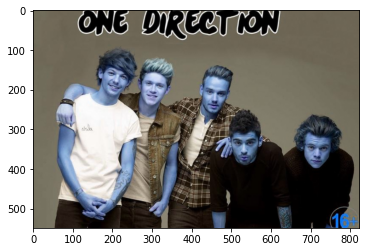

In [2]:
img = cv2.imread('oneD.jpg')

# Using cv2.COLOR_BGR2GRAY color space 
# conversion code 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY ) 
cv2.imwrite('c_gray.jpg', gray)

# Using cv2.COLOR_BGR2HSV color space 
# conversion code 
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV ) 
cv2.imwrite('c_hsv.jpg', hsv)

# Convert to YCrCb color space 
YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) 
cv2.imwrite('c_Ycrcb.jpg', YCrCb)

# Converts to LAB color space 
LAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
cv2.imwrite('c_lab.jpg', LAB)

#Edge map
edge = cv2.Laplacian(img, cv2.CV_64F)
cv2.imwrite('c_edge.jpg', edge)

#heat map
plt.imshow(img, cmap ='hot')  

#spectral map
plt.imshow(img, cmap ='nipy_spectral')  

## 2. Filter Color

In [9]:
img = cv2.imread('pepsi.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Threshold of blue in HSV space
# lower_blue = np.array([60, 35, 140])
# upper_blue = np.array([180, 255, 255])

lower_red = np.array([30,150,50])
upper_red = np.array([255,255,180])

#res = cv2.bitwise_and(frame,frame, mask= mask)

# preparing the mask to overlay
#mask = cv2.inRange(hsv, lower_blue, upper_blue)
mask = cv2.inRange(hsv, lower_red, upper_red)

# The black region in the mask has the value of 0,
# so when multiplied with original image removes all non-blue regions
result = cv2.bitwise_and(img, img, mask = mask)
cv2.imwrite('filter.jpg', result)

True

## 3. Denoising of colored images

There are four functions in opencv which is used for denoising of different images:

Syntax: cv2.fastNlMeansDenoisingColored( P1, P2, float P3, float P4, int P5, int P6)

Parameters:
- P1 – Source Image Array
- P2 – Destination Image Array
- P3 – Size in pixels of the template patch that is used to compute weights.
- P4 – Size in pixels of the window that is used to compute a weighted average for the given pixel.
- P5 – Parameter regulating filter strength for luminance component.
- P6 – Same as above but for color components // Not used in a grayscale image.


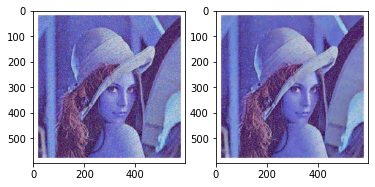

True

In [16]:
img = cv2.imread('noise.jpg') 
  
# denoising of image saving it into dst image 
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15) 
dst2 = cv2.fastNlMeansDenoisingColored(img, None, 15, 15, 9, 15)
dst3 = cv2.fastNlMeansDenoisingColored(img, None, 20, 10, 15, 15) 

  
# Plotting of source and destination image 
plt.subplot(121), plt.imshow(img) 
plt.subplot(122), plt.imshow(dst) 
  
plt.show()

x1 = np.concatenate((img, dst), axis = 1)
x2 = np.concatenate((dst2,dst3), axis = 1)
x3 = np.concatenate((x1,x2), axis = 0)
cv2.imwrite('denoise.jpg', x3)

## 4. Find Co-ordinates of Contours

Approach :
The Co-ordinates of each vertices of a contour is hidden in the contour itself. In this approach, we will be using numpy library to convert all the co-ordinates of a contour into a linear array. This linear array would contain the x and y co-ordinates of each contour. The key point here is that the first co-ordinate in the array would always be the co-ordinate of the topmost vertex and hence could help in detection of orientation of an image.

In [2]:
# Reading image 
font = cv2.FONT_HERSHEY_COMPLEX 
img2 = cv2.imread('test.jpg', cv2.IMREAD_COLOR) 
  
# Reading same image in another  
# variable and converting to gray scale. 
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE) 
  
# Converting image to a binary image 
# ( black and white only image). 
_, threshold = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY) 
  
# Detecting contours in image. 
contours, _= cv2.findContours(threshold, cv2.RETR_TREE, 
                               cv2.CHAIN_APPROX_SIMPLE) 
  
# Going through every contours found in the image. 
for cnt in contours : 
  
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True) 
  
    # draws boundary of contours. 
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5)  
  
    # Used to flatted the array containing 
    # the co-ordinates of the vertices. 
    n = approx.ravel()  
    i = 0
  
    for j in n : 
        if(i % 2 == 0): 
            x = n[i] 
            y = n[i + 1] 
  
            # String containing the co-ordinates. 
            string = str(x) + " " + str(y)  
  
            if(i == 0): 
                # text on topmost co-ordinate. 
                cv2.putText(img2, "Arrow tip", (x, y), 
                                font, 0.5, (255, 0, 0))  
            else: 
                # text on remaining co-ordinates. 
                cv2.putText(img2, string, (x, y),  
                          font, 0.5, (0, 255, 0))  
        i = i + 1
  
# Showing the final image. 
cv2.imwrite('contour.jpg', img2)  
  

True